# Linear Regression Algorithm

### Importing the libraries

In [2]:
import numpy as np

In [5]:
w = np.array([[1,1,1,1],[1,0,1,0],[0,2,1,1]])
W = np.array([1,0,0])

In [12]:
x = np.random.randn(100,3)
x.T.shape

(3, 100)

In [10]:
np.dot(W,x.T).shape

(100,)

### Importing the dataset

In [5]:
from sklearn import datasets

In [6]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [7]:
X.shape

(100, 1)

In [8]:
y.shape

(100,)

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Creating the architecture of Linear Regression

In [11]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.W = None
        self.b = None

    def fit(self, X, y):
        N, m = X.shape
        self.W = np.zeros(m)
        self.b = 0

        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.W) + self.b
            self.W += (self.lr/N)*np.dot(X.T, (y - y_pred))
            self.b += (self.lr/N)*np.sum(y - y_pred)
        
    def predict(self, X):
        y_hat = np.dot(X, self.W) + self.b
        return y_hat

## Visualizing the data

In [12]:
import matplotlib.pyplot as plt

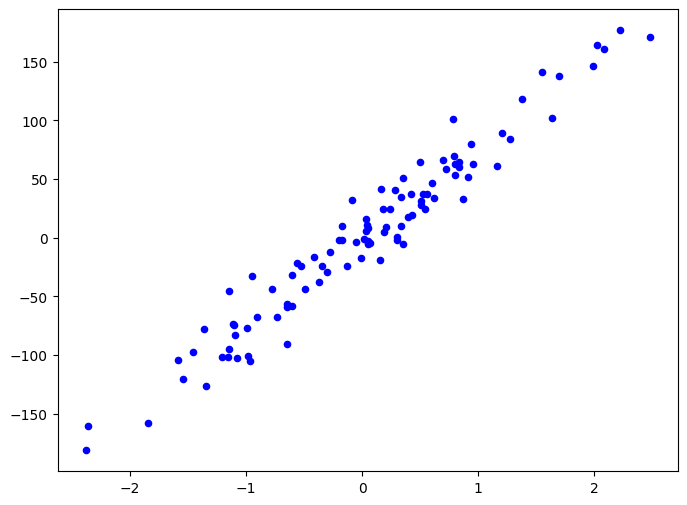

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=20)
plt.show()

### Training the Regression

In [20]:
regressor = LinearRegression(lr=0.01,n_iter=1000)
regressor.fit(X_train,y_train)

### Predicting the Test set results

In [21]:
y_pred = regressor.predict(X_test)

### Calculating the Mean Square Error

In [22]:
def MSE(y, y_hat):
    return (1/len(y))*np.sum((y-y_hat)**2)

In [23]:
print('MSE: ', MSE(y_test, y_pred))

MSE:  305.7719958301902


### Calucating Accuracy

In [25]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [26]:
accu = r2_score(y_test, y_pred)
print("Accuracy:", accu)

Accuracy: 0.9253717934621964


## Visualizing the results

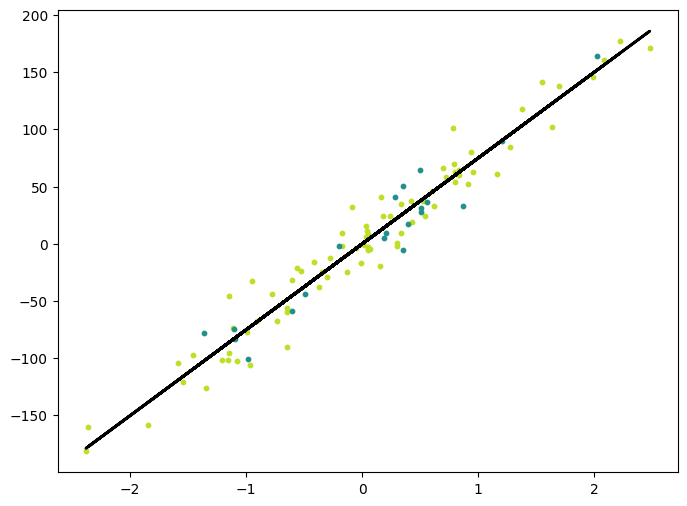

In [24]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()
